In [87]:
%matplotlib inline
import numpy
import sklearn
import sklearn.datasets
import sklearn.metrics
import sklearn.preprocessing
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Import data
Split into training and testing sets

In [97]:
digits = sklearn.datasets.load_digits()
test_size = 797/1797
shuffle = False
X_train, X_test, Y_train, Y_test = train_test_split(digits.data, digits.target, test_size=test_size, shuffle=shuffle)

assert X_train.shape == (1000, 64), X_train.shape
assert Y_test.shape == (797, ), X_train.shape

## Encode for classification

In [99]:
labelencoder = sklearn.preprocessing.OneHotEncoder()
Y_train_labeled = labelencoder.fit_transform(Y_train.reshape(-1,1)).todense()
Y_test_labeled = labelencoder.fit_transform(Y_test.reshape(-1,1)).todense()

assert Y_train_labeled.shape == (1000, 10), Y_train_labeled.shape

# Build PLSR models

In [118]:
def build_plsr(rows_used, components):
    X = X_train[0:rows_used,:]
    Y = Y_train_labeled[0:rows_used]
    assert X.shape[0] == Y.shape[0] == rows_used
    m = PLSRegression(n_components=components)
    m.fit(X, Y)
    return m

max_components = 50
model_components = range(1, max_components+1)
train_rows = range(100, 1100, 100)
models = [ [ build_plsr(rows_used, c) for c in model_components ] for rows_used in train_rows ]
len(models), len(models[0])

assert len(models) == 10
assert len(models[0]) == max_components

r 100 1
r 100 2
r 100 3
r 100 4
r 100 5
r 100 6
r 100 7
r 100 8
r 100 9
r 100 10
r 100 11
r 100 12
r 100 13
r 100 14
r 100 15
r 100 16
r 100 17
r 100 18
r 100 19
r 100 20
r 100 21
r 100 22
r 100 23
r 100 24
r 100 25
r 100 26
r 100 27
r 100 28
r 100 29
r 100 30
r 100 31
r 100 32
r 100 33
r 100 34
r 100 35
r 100 36
r 100 37
r 100 38
r 100 39
r 100 40
r 100 41
r 100 42
r 100 43
r 100 44
r 100 45
r 100 46
r 100 47
r 100 48
r 100 49
r 100 50
r 200 1
r 200 2
r 200 3
r 200 4
r 200 5
r 200 6
r 200 7
r 200 8
r 200 9
r 200 10
r 200 11
r 200 12
r 200 13
r 200 14
r 200 15
r 200 16
r 200 17
r 200 18
r 200 19
r 200 20
r 200 21
r 200 22
r 200 23
r 200 24
r 200 25
r 200 26
r 200 27
r 200 28
r 200 29
r 200 30
r 200 31
r 200 32
r 200 33
r 200 34
r 200 35
r 200 36
r 200 37
r 200 38
r 200 39
r 200 40
r 200 41
r 200 42
r 200 43
r 200 44
r 200 45
r 200 46
r 200 47
r 200 48
r 200 49
r 200 50
r 300 1
r 300 2
r 300 3
r 300 4
r 300 5
r 300 6
r 300 7
r 300 8
r 300 9
r 300 10
r 300 11
r 300 12
r 300 13
r 300 14
r

(10, 50)

# Models accuracy

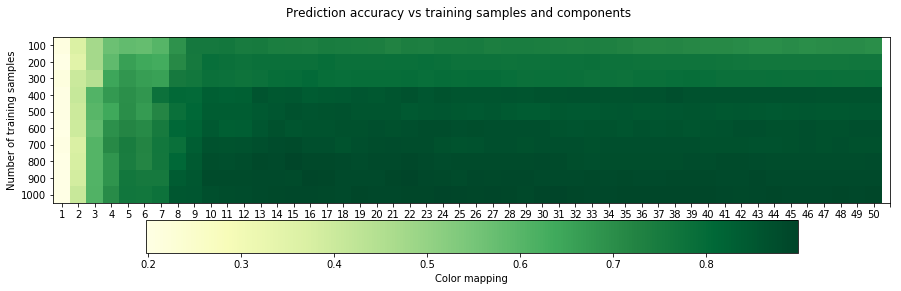

In [179]:
results = numpy.ndarray(shape=(len(models), len(models[0])))

for data_idx, _models in enumerate(models):
    for components_idx, model in enumerate(_models):
        Y_pred = model.predict(X_test).argmax(axis=1)

        # classification accuracy
        a = sklearn.metrics.accuracy_score(Y_test, Y_pred)
        results[data_idx, components_idx] = a


plt.tight_layout()
fig, axes = plt.subplots(figsize=(15,4))
fig.suptitle('Prediction accuracy vs training samples and components')
img = axes.imshow(results, cmap='YlGn', interpolation='nearest')
axes.set_ylabel('Number of training samples')
axes.set_yticks(range(len(train_rows)))
axes.set_yticklabels(train_rows, minor=False)
axes.set_xlabel('Number of components used')
axes.set_xticks(range(51))
axes.set_xticklabels(range(1,51))
cb = plt.colorbar(img, ax=axes, orientation='horizontal', pad=0.08)
cb.set_label('Color mapping')


# Questions

> Does the number of training objects matter for prediction performance?

Yes, up to a point. With < 300 samples the performance is not able to go above a plateu of about, regardless of the number of components used. Above this the effect is reduced, and at 900->1000 samples the improvement looks more marginal.

> Do the number of components used in the prediction matter for prediction performance?

Yes, up to a point. There is a marked increase in performance from 1->10 components.

With small sample sizes (<200), as number of components grow large (>30) the prediction accuracy actually degrades. This is a sign of overfitting to the training data.

> Which combination of the number of training objects and number of components used for prediction would you use?

1000 training objects, 10 components.

> Do you think the accuracy achieved with PLSR may be further improved using other classification methods?

I would expect that non-linear classification methods are able to significantly improve accuracy. For instance a model based on Support Vector Machine with a non-linear kernel.

It is known that Convolution Neural Networks are able to achieve <0.5% error rate on the full MINST set. 